#**YOLOv1**
* DaNang,19/06/2022 1:24 AM
* By LeoGino
* Contact: leo18gino@gmail.com
* Paper: https://www.analyticsvidhya.com/blog/2020/08/playing-with-yolo-v1-on-google-colab/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1**: Create Darknet 

In [ ]:
!rm -rf darknet
%cd /content/drive/MyDrive/YOLOv1
!git clone https://github.com/pjreddie/darknet
%cd /content/drive/MyDrive/YOLOv1/darknet
!rm -rf data
!mkdir data

/content/drive/MyDrive/YOLOv1
fatal: destination path 'darknet' already exists and is not an empty directory.
/content/drive/MyDrive/YOLOv1/darknet


In [ ]:
!ls

backup	  include	LICENSE.gpl   Makefile	 results
cfg	  LICENSE	LICENSE.meta  obj	 scripts
data	  LICENSE.fuck	LICENSE.mit   python	 src
examples  LICENSE.gen	LICENSE.v1    README.md  yolov1.weights


**Step 2**: Setup GPU

In [ ]:
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:1004:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda

**Step 3:** Download file weight of YOLOv1 (753MB). It will be save with filename "yolo1.weights".

In [ ]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

URL transformed to HTTPS due to an HSTS policy
--2022-06-19 05:47:20--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights’

yolov1.weights      100%[===================>] 752.75M  57.7MB/s    in 13s     

2022-06-19 05:47:33 (56.5 MB/s) - ‘yolov1.weights’ saved [789312988/789312988]



**Step 4:** Now, detect with image dog.png in "darknet/data".
* If you get an error: Unable to load image/label/* data. Png, so you have to download the label in https://github.com/AlexeyAB/darknet (darknet/data/label) and upload it to your drive. Otherwise, your predicted image will not have a label.
* If you get an error about ./darknet: You have to upload it to a drive, it's in the darknet/darknet, it's a disk not a file.

In [4]:
!pwd
%cd /content/drive/MyDrive/YOLOv1/darknet/
!chmod +x ./darknet
!./darknet yolo test /content/drive/MyDrive/YOLOv1/darknet/cfg/yolov1.cfg /content/drive/MyDrive/YOLOv1/darknet/yolov1.weights /content/drive/MyDrive/YOLOv1/darknet/data/traffic.jpg

/content/drive/MyDrive/YOLOv1/darknet
/content/drive/MyDrive/YOLOv1/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3

**Step 5:** Show result

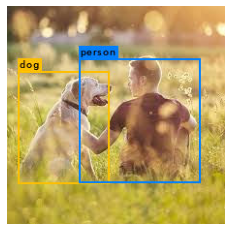

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/drive/MyDrive/YOLOv1/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)